In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
cat_feat =train.select_dtypes(include=[np.object])

In [4]:
cat_feat.describe()
target = train['SalePrice']

In [7]:
cat_feat['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [8]:
num_feat = train.select_dtypes(exclude=[np.object])
num_feat.shape

(1460, 38)

In [11]:
import matplotlib.pyplot as plt

In [12]:
target = np.log(target)

In [13]:
num_feat.columns.values

array(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

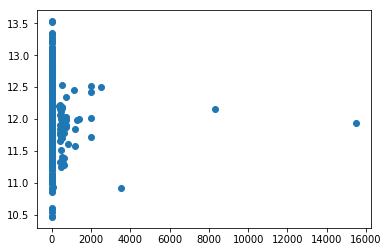

In [58]:
plt.scatter(x = num_feat['MiscVal'], y = target)

In [59]:
train = train[train['MiscVal'] < 4000]

In [60]:
train.shape

(1171, 81)

In [61]:
cat_feat =train.select_dtypes(include=[np.object])
num_feat =train.select_dtypes(exclude=[np.object])
print(cat_feat.shape, num_feat.shape)

(1171, 43) (1171, 38)


In [65]:
cat_feat['Street'].value_counts()
test = pd.read_csv('test.csv')

Pave    1167
Grvl       4
Name: Street, dtype: int64

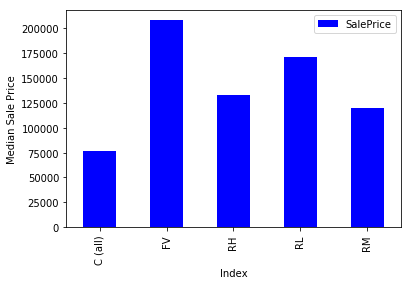

In [222]:
condition_pivot = train.pivot_table(index='MSZoning',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Index')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=90)
plt.show()

In [66]:
cat_feat['Street'].isnull().sum()

0

In [221]:
train['enc_Street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_Street'] = pd.get_dummies(train.Street, drop_first=True)

In [248]:
train.shape

(1171, 80)

In [71]:
cat_feat.isnull().sum()

MSZoning            0
Street              0
Alley            1088
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           31
BsmtCond           31
BsmtExposure       32
BsmtFinType1       31
BsmtFinType2       32
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       592
GarageType         73
GarageFinish       73
GarageQual         73
GarageCond         73
PavedDrive          0
PoolQC           1171
Fence             952
MiscFeature      1136
SaleType            0
SaleCondition       0
dtype: int64

In [225]:
def encode(x): return 1 if x == 'FV' else 0
train['enc_MSZoning'] = train.MSZoning.apply(encode)
test['enc_MSZoning'] = test.MSZoning.apply(encode)

In [224]:
train['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [247]:
test.drop(column, axis = 1, inplace = True)
train.drop(column, axis = 1, inplace = True)

In [229]:
columns = cat_feat.columns.values

In [245]:
column = [i for i in columns if i != 'PoolQC' and i != 'Utilities' ]

In [278]:
test.shape

(1459, 79)

In [274]:
test.interpolate(inplace = True)

In [286]:
X = train.drop(['SalePrice','Id'], axis = 1)

In [282]:
y = np.log(train['SalePrice'])

In [290]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [291]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [292]:
model = linear_model.LinearRegression()

In [293]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [294]:
model.score(X_test, y_test)

0.9028488661430669

In [295]:
predictions = model.predict(X_test)

In [296]:
from sklearn.metrics import mean_squared_error

In [297]:
mean_squared_error(y_test, predictions)

0.01624421497472836

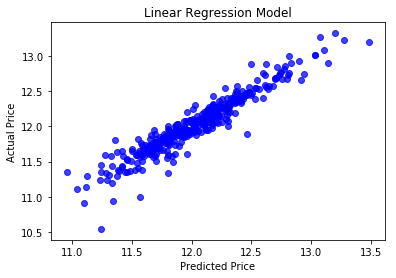

In [298]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [299]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [300]:
feat = test.drop(['Id'], axis = 1)

In [304]:
predictions = model.predict(feat)

In [305]:
predictions = np.exp(predictions)

In [307]:
submission['SalePrice'] = predictions

In [308]:
submission.head()

,Id,SalePrice
0,1461,119655.690237
1,1462,187498.880561
2,1463,183680.872071
3,1464,202584.325896
4,1465,200509.131364


In [309]:
submission.to_csv('submission_full_feat.csv', index = False)